In [1]:
# -*- coding: utf-8 -*-
"""
Created on 2023/04/11
Revised on 2023/05/30
 
@author: mjofre - Marc Jofre
e-mail: marc.jofre@upc.edu
Technical University of Catalonia - Universitat Politècnica de Catalunya (UPC)
"""
###########################################################################
# Seminar on Quantum Technologies for Cybersecurity: Networking and Systems
# Self-study
# Session 2 - Quantum implementation aspects

import os, sys, time
import numpy as np
import math
import matplotlib.pyplot as plt
from google.colab import files
import matplotlib.style
import matplotlib as mpl
#print(plt.style.available)
mpl.style.use('default')

try:  
  import qiskit
except:
  print("installing qiskit...")
  !pip install qiskit --quiet
  print("installed qiskit.")
  import qiskit


installing qiskit...
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 514.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.4/37.4 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 7.3 MB/s eta 0:00:00
installed qiskit.


# Self-study (5 hours):

Read on the principal aspects of quantum principles (2 hours):
 - https://tu-delft.foleon.com/tu-delft/quantum-internet/the-basics-to-understand-quantum-internet/
 - https://qiskit.org/learn/course/basics-quantum-information/
 - https://quantumatlas.umd.edu/entry/qubit/
 - https://quantumatlas.umd.edu/entry/measurement/
 - https://quantumatlas.umd.edu/entry/superposition/
 - https://quantumatlas.umd.edu/entry/measuring-polarization/
 - https://quantumatlas.umd.edu/entry/entanglement/
 - https://scienceexchange.caltech.edu/topics/quantum-science-explained/quantum-superposition
 - https://scienceexchange.caltech.edu/topics/quantum-science-explained/entanglement

Exercises on quantum principles (3 hours).


# Entangled States

https://learn.qiskit.org/course/ch-gates/multiple-qubits-and-entangled-states

## Contents

1. [Entangled States](#entangled)  
    1.1 [Visualizing Entangled States](#visual)    
    1.2 [Exercises](#ex3)

In [ ]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex, plot_state_qsphere
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
#qc.draw()

# Let's get the result:
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
#qobj = assemble(qc)
qobj = transpile(qc, svsim, optimization_level=3)
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

### 3.2 Entangled States <a id="entangled"></a>

We saw in the previous section we could create the state:

$$
\tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$ 

This is known as a _Bell_ state. We can see that this state has 50% probability of being measured in the state $|00\rangle$, and 50% chance of being measured in the state $|11\rangle$. Most interestingly, it has a **0%** chance of being measured in the states $|01\rangle$ or $|10\rangle$. We can see this in Qiskit:

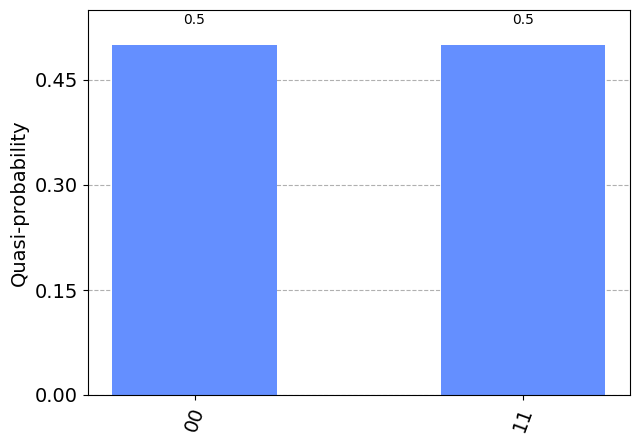

In [ ]:
plot_histogram(result.get_counts())

This combined state cannot be written as two separate qubit states, which has interesting implications. Although our qubits are in superposition, measuring one will tell us the state of the other and collapse its superposition. For example, if we measured the top qubit and got the state $|1\rangle$, the collective state of our qubits changes like so:

$$
\tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle) \quad \xrightarrow[]{\text{measure}} \quad |11\rangle
$$

Even if we separated these qubits light-years away, measuring one qubit collapses the superposition and appears to have an immediate effect on the other. This is the [‘spooky action at a distance’](https://en.wikipedia.org/wiki/Quantum_nonlocality) that upset so many physicists in the early 20th century.

It’s important to note that the measurement result is random, and the measurement statistics of one qubit are **not** affected by any operation on the other qubit. Because of this, there is **no way** to use shared quantum states to communicate. This is known as the no-communication theorem.[1]

### 3.3 Visualizing Entangled States<a id="visual"></a>

We have seen that this state cannot be written as two separate qubit states, this also means we lose information when we try to plot our state on separate Bloch spheres:

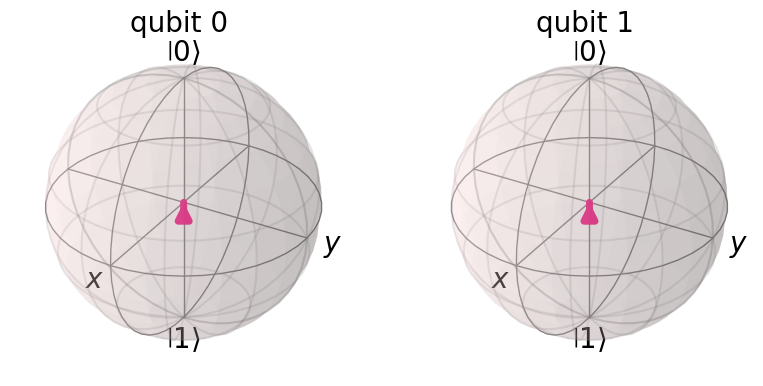

In [ ]:
plot_bloch_multivector(final_state)

Given how we defined the Bloch sphere in the earlier chapters, it may not be clear how Qiskit even calculates the Bloch vectors with entangled qubits like this. In the single-qubit case, the position of the Bloch vector along an axis nicely corresponds to the expectation value of measuring in that basis. If we take this as _the_ rule of plotting Bloch vectors, we arrive at this conclusion above. This shows us there is _no_ single-qubit measurement basis for which a specific measurement is guaranteed. This contrasts with our single qubit states, in which we could always pick a single-qubit basis. Looking at the individual qubits in this way, we miss the important effect of correlation between the qubits. We cannot distinguish between different entangled states. For example, the two states:

$$\tfrac{1}{\sqrt{2}}(|01\rangle + |10\rangle) \quad \text{and} \quad \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$

will both look the same on these separate Bloch spheres, despite being very different states with different measurement outcomes.

How else could we visualize this statevector? This statevector is simply a collection of four amplitudes (complex numbers), and there are endless ways we can map this to an image. One such visualization is the _Q-sphere,_ here each amplitude is represented by a blob on the surface of a sphere. The size of the blob is proportional to the magnitude of the amplitude, and the colour is proportional to the phase of the amplitude. The amplitudes for $|00\rangle$ and $|11\rangle$ are equal, and all other amplitudes are 0:

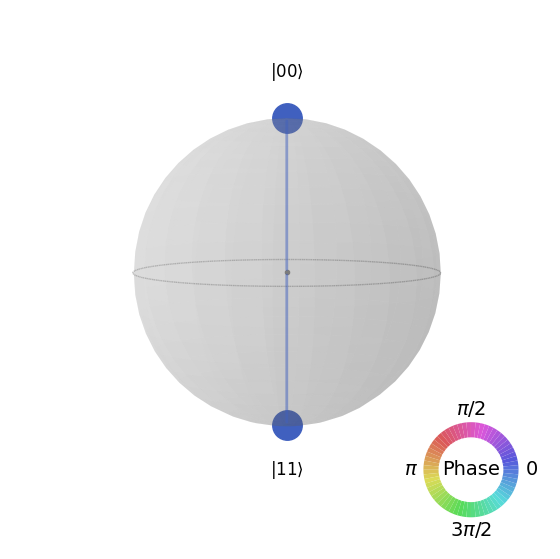

In [ ]:
plot_state_qsphere(final_state)

Here we can clearly see the correlation between the qubits. The Q-sphere's shape has no significance, it is simply a nice way of arranging our blobs; the number of `0`s in the state is proportional to the states position on the Z-axis, so here we can see the amplitude of $|00\rangle$ is at the top pole of the sphere, and the amplitude of $|11\rangle$ is at the bottom pole of the sphere.

### 3.4 Exercise: <a id="ex3"></a>
1. Create the state vector of the Bell state: $\tfrac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$.
   Use the statevector simulator (previous example above) to verify your result and the entanglement calculation function (as shown in the example below).


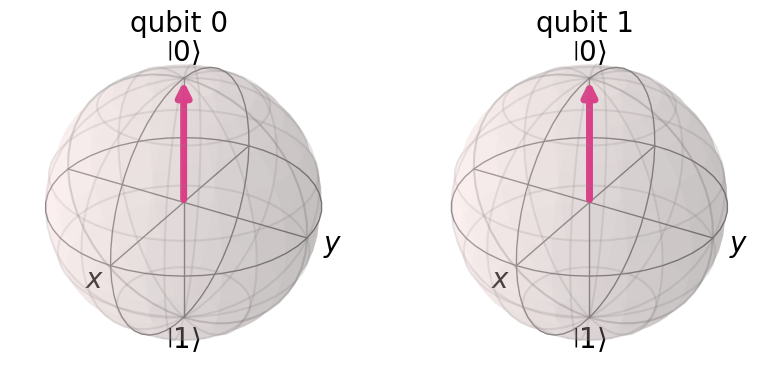

In [ ]:
from qiskit.quantum_info import Statevector, entanglement_of_formation
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
state = Statevector([1,0,0,0])

qc = QuantumCircuit(2)
qc.initialize(state.data, [0,1])

statevector = Statevector(qc)
plot_bloch_multivector(statevector)

In [ ]:
print(state.data)
print(f'State entanglement: {entanglement_of_formation(statevector):.2e}')

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
State entanglement: 0.00e+00


# Wrap-up of Probability errors and Fidelity

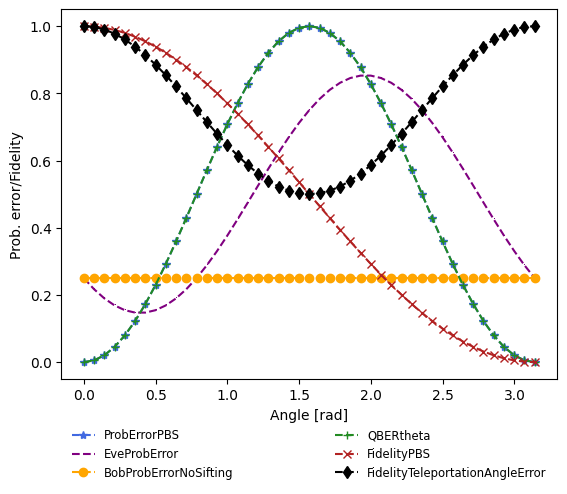

In [2]:
##############################################################################
# Relation of Probability errors, QBER, Fidelities with the the rotation of the measurement basis \theta
NcalcAngle=45
MaxAngle=np.pi
AnglesScan=np.linspace(0,MaxAngle,NcalcAngle)

ProbErrorPBS=1.0-np.cos(AnglesScan)**2
EveProbError=0.25*((1.0-np.cos(2.0*AnglesScan))+(1.0-np.sin(2.0*AnglesScan))) # Error probability when Eve is randomly changing basis (it is minimized to 14.64% when theta=np.pi/8 - Breidbart basis)
BobProbErrorNoSifting=0.25*((1.0-np.cos(2.0*AnglesScan)**2)+(1.0-np.sin(2.0*AnglesScan)**2)) # Error probability when Bob is randomly changes basis (before key sifting)
QBERtheta=1.0-np.cos(AnglesScan)**2 # Error probability equivalent to Bob when doing sifting
FidelityPBS=1.0-np.sin(AnglesScan/2.0)**2# Angle is half, because at np.pi/2.0 its like at half place between the two states
FidelityTeleportationAngleError=1.0-ProbErrorPBS/2.0

plt.figure()
line1,=plt.plot(AnglesScan,ProbErrorPBS,'royalblue',linestyle='dashed',marker='*')
line2,=plt.plot(AnglesScan,EveProbError,'purple',linestyle='dashed',marker=',')
line3,=plt.plot(AnglesScan,BobProbErrorNoSifting,'orange',linestyle='dashed',marker='o')
line4,=plt.plot(AnglesScan,QBERtheta,'forestgreen',linestyle='dashed',marker='+')
line5,=plt.plot(AnglesScan,FidelityPBS,'firebrick',linestyle='dashed',marker='x')
line6,=plt.plot(AnglesScan,FidelityTeleportationAngleError,'black',linestyle='dashed',marker='d')
plt.legend((line1, line2, line3, line4, line5, line6), ('ProbErrorPBS','EveProbError','BobProbErrorNoSifting','QBERtheta','FidelityPBS','FidelityTeleportationAngleError'),bbox_to_anchor=(0, -0.3, 1, 0), loc="lower left", mode="expand", ncol=2,shadow = False, fancybox = False, frameon = False, fontsize='small')# 'best'
plt.xlabel('Angle [rad]',color='k')
plt.ylabel('Prob. error/Fidelity',color='k')
plt.show()

####################################################
# Relevant trigonometric relations
# cos(theta)**2+sin(theta)**2=1
# sin(theta)**2=0.5*(1-cos(2theta))
# cos(theta)**2=0.5*(1+cos(2theta))